In [ ]:
import numpy as np 
import pandas as pd 
import re

**LOAD** **DATA**

In [ ]:
col_names = ['id', 'date', 'time', 'zone', 'user', 'text']
depressive_tweets_df = pd.read_csv('depressive.csv',sep = '|', header = None, usecols = range(0,6),names=col_names)
depressive_tweets_df['lable']=1

depressive_tweets_text_sample=depressive_tweets_df[['id','text','lable']]

depressive_tweets_text_sample.drop_duplicates(subset='text',inplace=True)
depressive_tweets_text_sample

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,id,text,lable
0,989292962323615744,The lack of this understanding is a small but ...,1
1,989292959844663296,i just told my parents about my depression and...,1
2,989292951716155392,depression is something i don't speak about ev...,1
3,989292873664393218,Made myself a tortilla filled with pb&j. My de...,1
4,989292856119472128,@WorldofOutlaws I am gonna need depression med...,1
...,...,...,...
2340,989036568781389830,Many sufferers of depression aren't sad; they ...,1
2341,989036542898397185,No Depression by G Herbo is my mood from now o...,1
2342,989036488162766848,What do you do when depression succumbs the br...,1
2343,989036488158572544,Ketamine Nasal Spray Shows Promise Against Dep...,1


In [ ]:
np.random.seed(1234)
col_names = ['target', 'id', 'date', 'flag', 'user', 'text']
normal_tweets_df = pd.read_csv('normal.csv',header = None, encoding = "ISO-8859-1",names=col_names)
normal_tweets_df = normal_tweets_df[normal_tweets_df["target"]==4]
#normal_tweets_df = normal_tweets_df[normal_tweets_df["target"]==0]
normal_tweets_df['lable']=1
normal_tweets_text = normal_tweets_df[['id','text','lable']]

normal_tweets_text_sample = normal_tweets_text.copy().sample(10000)
normal_tweets_text_sample

,id,text,lable
874567,1680093728,@Dreameress1 Hello!!! Hows it going?,1
1388602,2053040367,is on the train to london,1
1434586,2060651098,@TheLadyJane hey i wrote you a message today ...,1
1427220,2059350074,"@SuperRecords goodnight , im off to bed also ...",1
1050646,1960820806,@SilverSteer I am always wearing turquoise jew...,1
...,...,...,...
1446167,2062471197,@PrettyGirrl what now?,1
1555654,2185190736,Just got out of the shower So fresh &amp; clean.,1
1409706,2056080466,@snowho148. â« http://blip.fm/~7qy4p,1
1402397,2054703795,Very excited to see our balcony plants now hav...,1


In [ ]:
tweets_text_df = pd.concat([depressive_tweets_text_sample,normal_tweets_text_sample])
tweets_text_df

,id,text,lable,emoji,normalized_text
0,989292962323615744,The lack of this understanding is a small but ...,1,None,the lack of this understanding is a small but ...
1,989292959844663296,i just told my parents about my depression and...,1,None,i just told my parents about my depression and...
2,989292951716155392,depression is something i don't speak about ev...,1,None,depression is something i do not speak about e...
3,989292873664393218,Made myself a tortilla filled with pb&j. My de...,1,None,made myself a tortilla filled with pbj my depr...
4,989292856119472128,@WorldofOutlaws I am gonna need depression med...,1,"['<Emoji: Pouting face>', '<Emoji: Face with s...",i am gonna need depression meds soon these ra...
...,...,...,...,...,...
1446167,2062471197,@PrettyGirrl what now?,1,NaN,NaN
1555654,2185190736,Just got out of the shower So fresh &amp; clean.,1,NaN,NaN
1409706,2056080466,@snowho148. â« http://blip.fm/~7qy4p,1,NaN,NaN
1402397,2054703795,Very excited to see our balcony plants now hav...,1,NaN,NaN


In [ ]:
#find all emoji
def remove_emoji(dataframe):
    dataframe['emoji']=None
    for i in range(0,dataframe.shape[0]):
        temp=re.compile(r'<?[e|E]moji:.*?>')
        emoji_list=temp.findall(str(dataframe.iloc[i,1]))
        if len(emoji_list)==0:
            dataframe.iloc[i,3]=None
        else:
            dataframe.iloc[i,3]=str(emoji_list)
        text_without_emoji=re.sub(temp, '', str(dataframe.iloc[i,1]))
        dataframe.iloc[i,1]=text_without_emoji
    return dataframe
depressive_tweets_text_sample=remove_emoji(depressive_tweets_text_sample)
normal_tweets_text_sample=remove_emoji(normal_tweets_text_sample)
tweets_text_df=remove_emoji(tweets_text_df)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
depressive_tweets_text_sample

,id,text,lable,emoji
0,989292962323615744,The lack of this understanding is a small but ...,1,None
1,989292959844663296,i just told my parents about my depression and...,1,None
2,989292951716155392,depression is something i don't speak about ev...,1,None
3,989292873664393218,Made myself a tortilla filled with pb&j. My de...,1,None
4,989292856119472128,@WorldofOutlaws I am gonna need depression med...,1,"['<Emoji: Pouting face>', '<Emoji: Face with s..."
...,...,...,...,...
2340,989036568781389830,Many sufferers of depression aren't sad; they ...,1,None
2341,989036542898397185,No Depression by G Herbo is my mood from now o...,1,None
2342,989036488162766848,What do you do when depression succumbs the br...,1,None
2343,989036488158572544,Ketamine Nasal Spray Shows Promise Against Dep...,1,None


In [ ]:
normal_tweets_text_sample

,id,text,lable
874567,1680093728,@Dreameress1 Hello!!! Hows it going?,1
1388602,2053040367,is on the train to london,1
1434586,2060651098,@TheLadyJane hey i wrote you a message today ...,1
1427220,2059350074,"@SuperRecords goodnight , im off to bed also ...",1
1050646,1960820806,@SilverSteer I am always wearing turquoise jew...,1
...,...,...,...
1446167,2062471197,@PrettyGirrl what now?,1
1555654,2185190736,Just got out of the shower So fresh &amp; clean.,1
1409706,2056080466,@snowho148. â« http://blip.fm/~7qy4p,1
1402397,2054703795,Very excited to see our balcony plants now hav...,1


In [ ]:
tweets_text_df

,id,text,lable,emoji
0,989292962323615744,The lack of this understanding is a small but ...,1,None
1,989292959844663296,i just told my parents about my depression and...,1,None
2,989292951716155392,depression is something i don't speak about ev...,1,None
3,989292873664393218,Made myself a tortilla filled with pb&j. My de...,1,None
4,989292856119472128,@WorldofOutlaws I am gonna need depression med...,1,"['<Emoji: Pouting face>', '<Emoji: Face with s..."
...,...,...,...,...
120364,1833084157,I can't download K-lite codec pack,0,None
582486,2214628609,@britishxo and u didnt come see me !,0,None
665934,2245101277,looking forward to a great weekend of revising...,0,None
298983,1997866869,Heidi and spencer are michigamua-esque,0,None


DATA PRE-PROCESSING

In [ ]:
# Expand Contraction
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "i would",
  "i'd've": "i would have",
  "i'll": "i will",
  "i'll've": "i will have",
  "i'm": "i am",
  "i've": "i have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you will",
  "you'll've": "you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

In [ ]:
def remove_html(text):
    URL = re.compile(
        r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))')
    stripped_text = re.sub(URL, "", text)  
    return stripped_text


In [ ]:
def remove_xa0(text):
    stripped_text = re.sub(r'\xa0', "", text)
    return stripped_text


In [ ]:
def remove_mention(text):
    stripped_text = re.sub(r"\s*@\S*?\s*(:| |$)", " ", text)  
    return stripped_text

In [ ]:
def remove_hash(text):
    stripped_text = re.sub(r"#", " ", text)  
    return stripped_text

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    wnl = nltk.WordNetLemmatizer()
    lem_list = [wnl.lemmatize(t) for t in tokens]
    lem_text = ' '.join(lem_list)

    tokens = nltk.word_tokenize(lem_text)
    lancaster = nltk.LancasterStemmer()
    lem_list = [lancaster.stem(t) for t in tokens]
    lem_text = ' '.join(lem_list)
    return lem_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    stripped_text = re.sub(pattern, '', text)
    return stripped_text

In [ ]:
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

tokenizer = ToktokTokenizer()
stopword_list = list(stopwords.words('english'))
stopword_list.remove('no')
stopword_list.remove('not')

def remove_stopwords(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]

    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_tweets(tweets):
    cleaned_tweets = []
    for tweet in tweets:
        tweet = str(tweet)
        tweet = tweet.lower()

        #expand contraction
        tweet = expandContractions(tweet)

        #remove html
        tweet = remove_html(tweet)

        #remove mentions
        tweet = remove_mention(tweet)

        #remove _xa0
        tweet = remove_xa0(tweet)

        #lemmatize_text
        tweet = lemmatize_text(tweet)

        #remove_stopwords
        tweet = remove_stopwords(tweet)

        # remove speacial characters
        tweet = remove_special_characters(tweet, remove_digits=True)

        cleaned_tweets.append(tweet)
        
    return cleaned_tweets

In [ ]:
X_text = clean_tweets([tweet for tweet in tweets_text_df['text']])
#X_text

In [ ]:
X_text_normal = clean_tweets([tweet for tweet in normal_tweets_text_sample['text']])
normal_tweets_text_sample['normalized_text']=X_text_normal
#normal_tweets_text_sample.to_excel("normal_tweets_text_sample_0only.xlsx")
normal_tweets_text_sample.to_excel("normal_tweets_text_sample.xlsx")

In [ ]:
normal_tweets_text_sample

,id,text,lable,emoji,normalized_text
74567,1694859308,@christinasound I'm like a few blocks from you...,0,None,i am like a few blocks from you right now and...
588602,2216712797,hope something good is on the tube tonight. no...,0,None,hope something good is on the tube tonight no ...
634586,2233351808,doing helllla shit for tricia's graduation/goi...,0,None,doing helllla shit for tricias graduationgoing...
627220,2230855825,Chillen...school is almost done a few more day...,0,None,chillenschool is almost done a few more days t...
250646,1983270711,@Oh_Gina hehe thanks But 10 weeks is a long t...,0,None,hehe thanks but weeks is a long time to wait
...,...,...,...,...,...
120364,1833084157,I can't download K-lite codec pack,0,None,i cannot download klite codec pack
582486,2214628609,@britishxo and u didnt come see me !,0,None,and u didnt come see me
665934,2245101277,looking forward to a great weekend of revising...,0,None,looking forward to a great weekend of revising...
298983,1997866869,Heidi and spencer are michigamua-esque,0,None,heidi and spencer are michigamuaesque


In [ ]:
X_text_depressive = clean_tweets([tweet for tweet in depressive_tweets_text_sample['text']])
depressive_tweets_text_sample['normalized_text']=X_text_depressive
depressive_tweets_text_sample.to_excel("depressive_tweets_text_sample.xlsx",encoding='utf-8')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
depressive_tweets_text_sample["lable"].describe()

count    2287.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: lable, dtype: float64

WORDCLOUD

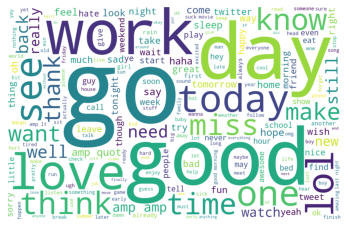

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
        background_color="white", 
        width=1500,              
        height=960,              
        margin=10               
        ).generate(" ".join(X_text_normal))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()


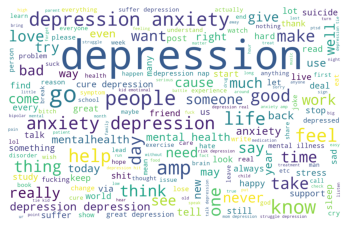

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
        background_color="white", 
        width=1500,              
        height=960,              
        margin=10               
        ).generate(" ".join(X_text_depressive))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
